In [6]:
import numpy as np
from matplotlib import pyplot as plt

In [7]:
#load dataset
u = np.loadtxt("../lab2_1_data.csv", delimiter=",", unpack=True)
print(u)

[[ 0.74589   -0.43265  ]
 [ 0.43352   -0.53858  ]
 [ 0.34667   -0.35825  ]
 [ 0.43563   -0.95307  ]
 [ 0.87224   -0.59757  ]
 [ 0.91057   -0.7319   ]
 [ 0.53584   -0.75979  ]
 [ 0.34912   -0.31302  ]
 [ 0.54057   -0.56459  ]
 [ 0.46997   -0.97972  ]
 [ 0.70024   -0.38539  ]
 [ 0.77378   -0.29958  ]
 [ 0.82682   -0.64523  ]
 [ 0.14546   -0.23598  ]
 [ 0.68834    0.28251  ]
 [ 0.35971   -0.10906  ]
 [ 0.81554   -0.74388  ]
 [ 0.48447   -0.79279  ]
 [ 0.29453   -0.70226  ]
 [ 0.64096   -0.2039   ]
 [ 0.45428   -0.53894  ]
 [ 0.63494   -0.40594  ]
 [ 0.37933   -0.12101  ]
 [ 0.23349   -0.51425  ]
 [ 0.90886   -0.57161  ]
 [ 0.43876   -0.16906  ]
 [ 0.33963   -0.66784  ]
 [ 0.41841   -0.61187  ]
 [ 0.42219   -0.42756  ]
 [ 0.25524   -0.59752  ]
 [ 0.5083    -0.81311  ]
 [ 0.84596   -0.31124  ]
 [ 0.14035   -0.92162  ]
 [ 0.39587   -1.0015   ]
 [ 0.63698   -0.75599  ]
 [ 0.3541    -0.47215  ]
 [ 0.68447    0.015025 ]
 [ 0.33946   -0.43013  ]
 [ 0.55213   -0.54293  ]
 [ 0.79272    0.093924 ]


In [8]:
def linear_model(u,w):
    return np.dot(u,w)

In [9]:
#w = np.transpose(np.array([np.random.rand(100),np.random.rand(100)]))
w = np.random.rand(len(u), 2)*2 - 1 

#print('\n\n w',w)
#print('\n\n u',u)
#v = linear_model(u[0], w[0])
#print('\n\n v',v)

In [20]:
#3) Implement Basic Hebb Rule
eta = 1

epochs = 10
v = np.zeros(len(u))
wold = np.zeros_like(w)

for N in range (epochs):
    uu = np.random.permutation(u)  #va bene? 
    for i in range (len(uu)):
        v[i] = linear_model(uu[i], w[i])
        wold[i] = w[i]
        w[i] = w[i] + eta*v[i]*u[i]
    
    #if (np.abs(w[i]-wold[i])) < 0.1


[[ 0.97157757  0.62751377]
 [-0.20415219 -0.36926509]
 [-0.1743083  -0.33424189]
 [-0.70522103 -0.69022677]
 [-1.40165546  0.216199  ]
 [ 0.87948149 -0.43751451]
 [ 0.13511067  0.37501832]
 [-0.74441557  0.91886473]
 [ 0.41636036  0.50542482]
 [ 0.15062866  0.11557382]
 [-0.51662287 -0.39953414]
 [ 0.08092771  0.07796057]
 [-0.0088516  -0.0134418 ]
 [-0.3696536  -0.33821945]
 [-0.82840928 -0.99667305]
 [-0.18561542 -0.81500356]
 [-3.25194885  3.67311853]
 [-0.42361172 -1.12646745]
 [-0.62256016 -0.19739806]
 [-0.09579991 -0.40224517]
 [ 0.70819161  0.71360585]
 [-0.02437578 -0.46351376]
 [ 0.337856   -0.68993217]
 [ 0.40215871  0.68368921]
 [ 0.32312366 -0.40178516]
 [ 0.36175137  0.82880329]
 [ 0.48217654  0.14722788]
 [-0.27500761 -0.09559687]
 [ 0.47859479  0.20406885]
 [-0.49807519 -0.21749852]
 [-0.43366284 -1.01031514]
 [-1.377384   -0.61137126]
 [ 0.66688456 -1.42398861]
 [-0.67003304 -0.48722227]
 [-0.46796639 -1.19739395]
 [ 0.31916995  0.11207163]
 [-0.49483955 -0.60978722]
 

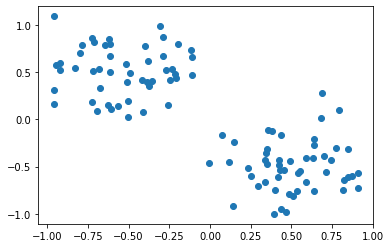

In [24]:
#P1
x = (np.transpose(u))[0]
y = (np.transpose(u))[1]

print(w)

plt.scatter(x,y)